**In this experiment we will in increase privacy lavel of coreset**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as model_selection
from sklearn.metrics import balanced_accuracy_score
import numpy as np
np.random.seed(42)
from collections import Counter
import matplotlib.pyplot as plt
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

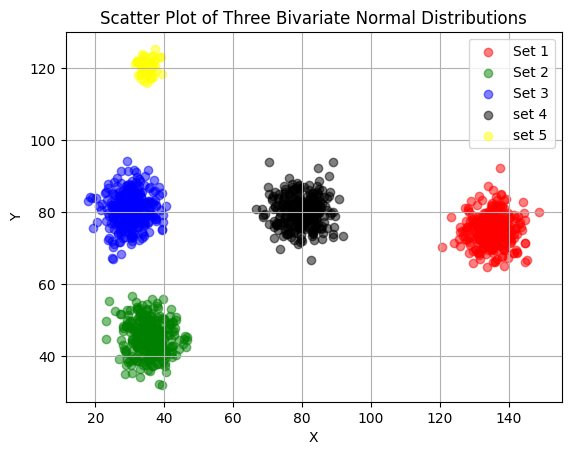

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Parameters for the three bivariate normal distributions
means = [[135, 75], [35, 45], [30, 80],[80,80],[35,120]]
covariances = [[[20, 0], [0, 20]], [[20, 0], [0, 20]],[[20, 0], [0, 20]],[[20, 0], [0, 20]], [[5, 0], [0, 5]]]
sizes = [300, 300,300,300, 50]

# Generate 2D data from the three bivariate normal distributions
data_sets = [np.random.multivariate_normal(means[i], covariances[i], sizes[i]) for i in range(5)]
# print(data_sets)
# Plot the scatter plot for each data set
colors = ['red', 'green', 'blue','black','yellow']
labels = ['Set 1', 'Set 2', 'Set 3','set 4','set 5']

for i in range(5):
    plt.scatter(data_sets[i][:, 0], data_sets[i][:, 1], alpha=0.5, color=colors[i], label=labels[i])

# Add labels and legend
plt.title('Scatter Plot of Three Bivariate Normal Distributions')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
X=np.concatenate(data_sets)
X

array([[137.22137322,  74.38166325],
       [137.8965512 ,  81.81119658],
       [133.95283427,  73.9529077 ],
       ...,
       [ 32.19036517, 121.81838208],
       [ 34.37621992, 119.37443725],
       [ 36.76732529, 120.76037781]])

In [ ]:
km1 =KMeans(n_clusters=5, max_iter=5)
y_predicted = km1.fit_predict(X)
B=np.array(km1.cluster_centers_)

print("Roughly kmean center :", B)

Roughly kmean center : [[ 30.1133969   80.48829282]
 [ 79.64091736  80.19837479]
 [134.95177112  74.92730885]
 [ 35.48065773  45.32686425]
 [ 35.06392598 120.32825757]]


In [ ]:
import numpy as np
import pandas as pd

def aglo2(X, B, k):
    a = 16 * (np.log(k) + 2)
    Bi = [[] for _ in range(len(B))]
    X_dist = []
    X_min_bindx = []

    for i in range(len(X)):
        min_dist = 10000000000
        min_index = -1
        Xi = X[i]

        for j in range(len(B)):
            bj =B[j]
            dist = np.sum((Xi - bj) ** 2)

            if dist < min_dist:
                min_dist = dist
                min_index = j

        Bi[min_index].append(X[i])
        X_dist.append(min_dist)
        X_min_bindx.append(min_index)

    c_phi = 0

    for i in range(len(X)):
        c_phi += X_dist[i]

    S_x = []
    sigma_s = 0

    for i in range(len(X)):
        si = 0
        si += (a * X_dist[i]) / (c_phi)
        b_index = X_min_bindx[i]
        bi = B [b_index]
        temp_sum = 0

        for j in range(len(Bi[b_index])):
            temp_sum += np.sum((bi - Bi[b_index][j]) ** 2)

        si += (2 * a * temp_sum) / (len(Bi[b_index]) * c_phi)
        si += 4 * len(X) / len(Bi[b_index])
        S_x.append(si)
        sigma_s += si

    p_x = []
    for i in range(len(X)):
        p_x.append(S_x[i] / sigma_s)
    np.random.shuffle(p_x)
    return np.argmax(p_x)

In privet center function, we will get a privet center of set of t data points

In [ ]:
def k_closest_points(points, k, i):
    distances = []
    for point in points:
        distance = np.sqrt(np.sum((point -  points[i])** 2))
        distances.append((distance, point))
    return sorted(range(len(distances)), key=lambda i: distances[i])[:k]

import numpy as np
import random

def privet_center(points, E):
    center = []
    for x in range(points.shape[1]):
        co_ordinates = [i[x] for i in points]
        min_v = min(co_ordinates)
        max_v = max(co_ordinates)
        s = np.sum(co_ordinates) - len(co_ordinates) * ((min_v + max_v) / 2) + np.random.laplace(scale=(max_v - min_v) / E)
        c = len(co_ordinates) + np.random.laplace(scale=2 / E)
        if c <= 1:
            center.append((min_v + max_v) / 2)
        else:
            center.append((s / c) + ((min_v + max_v) / 2))
    return center



we will not use a selected point, direct as a center. but we will calculet a private center of t closet points of that selected point, and we will add that poin in coreset.

In [ ]:
import math
# print(point_got)
def Private_k_Mean(P,k, B, t,E):
  D=[]
  n=len(P)
  while len(P)>t :
    c_index=aglo2(P, B, k)
    t_index=k_closest_points(P,t,c_index)
    c=privet_center(P[t_index],E)
    P=np.delete(P,t_index, axis=0)

    D.append(c)

  return np.array(D)



In [ ]:
def cost(X,centers):
  sum=0
  for i in range(len(X)):
    point1=X[i]
    cost_i=100000
    for j in range(len(centers)):
      point2=centers[j]
      if(np.sum((point1 - point2)**2)<cost_i):
        cost_i=np.sum((point1 - point2)**2)
    sum+=cost_i
  return sum

In [ ]:
point_got=Private_k_Mean(X,5, B, 10,0.3)

In [ ]:
point_got

array([[136.18237863,  72.03517887],
       [134.35504327,  67.49999186],
       [ 74.1847673 ,  81.57989038],
       [ 37.20830035,  54.01751078],
       [132.60728716,  79.05408275],
       [ 31.01561453,  47.65251605],
       [ 76.78027715,  88.65325849],
       [ 86.09036618,  77.15852661],
       [ 76.13311803,  81.71800806],
       [ 29.54882488,  48.25144403],
       [143.90407837,  71.88095836],
       [ 34.33073868, 118.96163423],
       [ 35.13394904,  76.65706227],
       [ 26.29501557,  86.47868037],
       [ 35.05740374,  48.04261941],
       [ 37.08666652,  76.74129886],
       [139.94366836,  70.22861206],
       [135.68317539,  74.34220634],
       [ 81.39124023,  77.39010643],
       [ 37.78741267,  52.8262482 ],
       [136.84088482,  74.17209127],
       [ 83.91976909,  82.9959774 ],
       [ 33.675846  ,  42.72256062],
       [ 81.05835354,  77.79910751],
       [ 33.58675457,  87.28575755],
       [126.95359005,  57.22088877],
       [ 28.84782367,  75.79851223],
 

In [ ]:
corset_error=[]
random_error=[]
k=5
km_full =KMeans(n_clusters=5)
y_full = km_full.fit_predict(X)
cost_org=km_full.inertia_
for l in  range(40,len(point_got),5):
  km_sub=KMeans(n_clusters=5)
  km_sub.fit_predict(point_got[:l,:])
  sub_center=km_sub.cluster_centers_
  cost_by_sub_center=cost(X,sub_center)
  error=(cost_by_sub_center- cost_org)/cost_org * 100
  corset_error.append(error)
  km_sub=KMeans(n_clusters=5)
  km_sub.fit_predict(X[np.random.choice(len(X), l, replace=False)])
  sub_center=km_sub.cluster_centers_
  cost_by_sub_center=cost(X,sub_center)
  error=(cost_by_sub_center- cost_org)/cost_org * 100
  random_error.append(error)

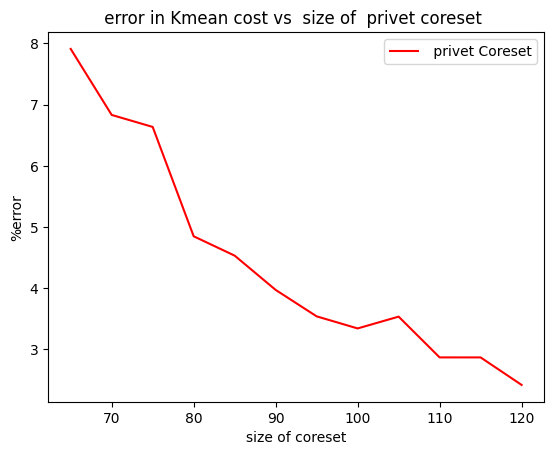

In [ ]:
import matplotlib.pyplot as plt

# Example data
x1 = corset_error[5:]

x3 =random_error
y = range(40,len(point_got),5)[5:]

# Plot x1 in red
plt.plot(y, x1, color='red', label=' privet Coreset')

# # Plot x2 in green
# plt.plot(y, x2, color='green', label='subset_using_dist')
# Plot x2 in green
# plt.plot(y, x3, color='blue', label='random_subet')

# Customize the plot
plt.xlabel('size of coreset')
plt.ylabel('%error')
plt.title(' error in Kmean cost vs  size of  privet coreset  ')
plt.legend()

# Show the plot
plt.show()

In [ ]:
corset_error=[]

k=5
km_full =KMeans(n_clusters=5)
y_full = km_full.fit_predict(X)
cost_org=km_full.inertia_
for E in  [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  km_sub=KMeans(n_clusters=5)
  km_sub.fit_predict(Private_k_Mean(X,5, B, 10,E))
  sub_center=km_sub.cluster_centers_
  cost_by_sub_center=cost(X,sub_center)
  error=(cost_by_sub_center- cost_org)/cost_org * 100
  corset_error.append(error)

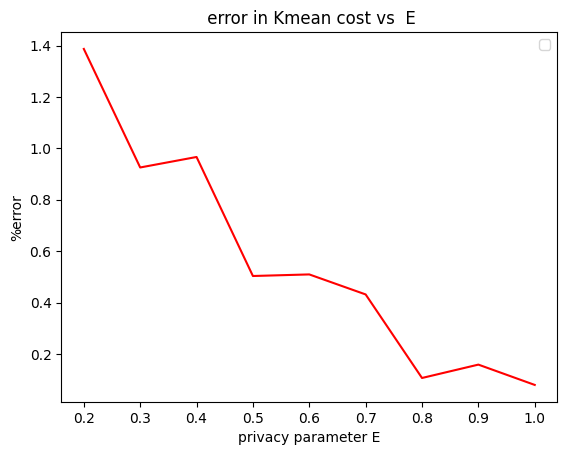

In [ ]:
import matplotlib.pyplot as plt

# Example data
x1 = corset_error

# x3 =random_error
y = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Plot x1 in red
plt.plot(y, x1, color='red')

# # Plot x2 in green
# plt.plot(y, x2, color='green', label='subset_using_dist')
# Plot x2 in green
# plt.plot(y, x3, color='blue', label='random_subet')

# Customize the plot
plt.xlabel('privacy parameter E')
plt.ylabel('%error')
plt.title(' error in Kmean cost vs  E')
plt.legend()

# Show the plot
plt.show()